In [1]:
# things we will need to do stuff in this notebook
%pip install umap-learn
import numpy as np
import pandas as pd
from scipy import stats
from numpy.linalg import norm
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from umap import UMAP

# two useful data viz libraries
import matplotlib.pyplot as plt
#import seaborn as sns

# setup plotting in a notebook in a reasonable way
%matplotlib inline
%config InlineBackend.figure_format='retina'

# default figure aesthetics I'll be using, 
# there are other choices, see seaborn docs
#sns.set_style("white")
#sns.set_context("notebook")

Note: you may need to restart the kernel to use updated packages.


In [2]:
def grayscale(img):
    """ Function to convert RGB image to grayscale. 
    This function should return a H*W array which is the grayscale version of original image. 
    """    
    if len(img.shape) == 3:
        # RGB image
        r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]
        gray = 0.299 * img[:,:,0] + 0.587 * img[:,:,1] + 0.114 * img[:,:,2]
    else:
        # Grayscale image
        gray = img
    return gray

#plt.imshow(img)
#plt.show()
#grayscale_img = grayscale(img)
#plt.imshow(grayscale_img, cmap='gray')
#plt.show()
#shoudl be able to reverse this to go back to color image

In [3]:
from PIL import Image
import numpy as np
import os
from sklearn.metrics.pairwise import euclidean_distances

# Default parameters of the images
default_width = 136
default_length = 102
default_dimension = default_width * default_length # this change is for the grayscale to work 
num_of_channels = 3
default_dimension = 35625
#these two were commented out for grayscale earlier

# Load in all of the images stored in the sneakers folder
# Define the collection of images
image_collection = np.zeros((1, default_dimension))
print(f"image_collection shape is: {image_collection.shape}")
# Pathway to the main folder that holds all types of shoes
main_path = "./sneakers"
# Makes a list of folder names found in the main folder
folders = os.listdir(main_path)

# Iterates through those folder names
for i, folder in enumerate(folders):
    # Keeps track of progress of folder dive
    print(f"Inside folder {i+1}: {folder}")
    # Creates the pathway to the folder inside the main folder 
    folder_path = os.path.join(main_path, folder)
    # List all files in the folder
    files = os.listdir(folder_path)
    # Iterate through all of the files and add them to the collection of flattened images
    for file in files:
        # Creates the pathway to the images inside the folder
        image_path = os.path.join(folder_path, file)
        # Loads the images into the notebook as a list and then changes it to a numpy array
        image_list = Image.open(image_path)
        
        #image_gray = image_list.convert('L')  # Convert to grayscale
        #image_np = np.array(image_gray)

        image_np = np.array(image_list)
        image_gray = grayscale(image_np) # make a copy of all the color images so can call back to that at the end
        
        # Remove rows and columns
        rows_to_delete = [0, 1, 2, -1, -2, -3, -4]
        cols_to_delete = [0, 1, 2, 3, 4, 5, -1, -2, -3, -4, -5]
        image_np = np.delete(image_np, rows_to_delete, axis=0)  
        image_np = np.delete(image_np, cols_to_delete, axis=1)
        #image_gray = np.delete(image_np, rows_to_delete, axis=0) #for the grayscale to actually apply would need to implement this it throws error
        #image_gray = np.delete(image_np, cols_to_delete, axis=1)
        # earlier commented out this code so that the package function to do this would work
        
        # Flatten the image
        image_flat = image_np.reshape(1, -1)
        #image_flat = image_gray.reshape(1, -1)

        # If this is the first image, index instead of stack inside the collection
        if i == 0:
            image_collection[0] = image_flat
        else:
            image_collection = np.vstack((image_collection, image_flat))

print(f"image_collection shape is: {image_collection.shape}")

image_collection shape is: (1, 35625)
Inside folder 1: AdidasOriginals
Inside folder 2: adidasY-3
Inside folder 3: Aetrex
Inside folder 4: ALDO
Inside folder 5: AlexanderMcQueen
Inside folder 6: Amiana
Inside folder 7: BetseyJohnson
Inside folder 8: Converse
Inside folder 9: Crocs
Inside folder 10: DSQUARED2
Inside folder 11: DVS Shoe Company
Inside folder 12: Easy Spirit
Inside folder 13: ECCO
Inside folder 14: GUESS
Inside folder 15: KangaROOS
Inside folder 16: Lacoste
Inside folder 17: Nike
Inside folder 18: Paul Smith
Inside folder 19: Reebok
Inside folder 20: SKECHERS
Inside folder 21: UGG
image_collection shape is: (1978, 35625)


[255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 255. 254. 254. 254. 255. 255. 255. 253.
 253. 253. 255. 255. 253. 254. 254. 252. 166. 166. 164.  31.  31.  29.
  42.  42.  42.  37.  37.  37.  34.  34.  34.  33.  33.  33.  35.  35.
  37.  37.  37.  39.  47.  47.  49.  62.  62.  64.  67.  67.  69.  71.
  71.  73.  86.  84.  87. 101.  99. 102. 119. 114. 118.  99.  97. 100.
  64.  62.  65.  38.  38.  40.  36.  36.  38.  43.  44.  46.  43.  43.
  45.  46.  44.  47.  39.  37.  40.  47.  47.  49.  55.  56.  58.  55.
  56.  60.  55.  54.  59. 119.  45.  44. 153.  36.  42. 196.  33.  38.
 223.  35.  36. 233.  35.  32. 236.  34.  34. 237.  36.  42. 240.  40.
  50. 250.  52.  53. 253.  45.  58. 189.  29.  41. 109.  27.  29.  58.
  23.  19.  47.  38.  33. 103. 112. 107. 189. 201. 199. 238. 249. 251.
 253. 

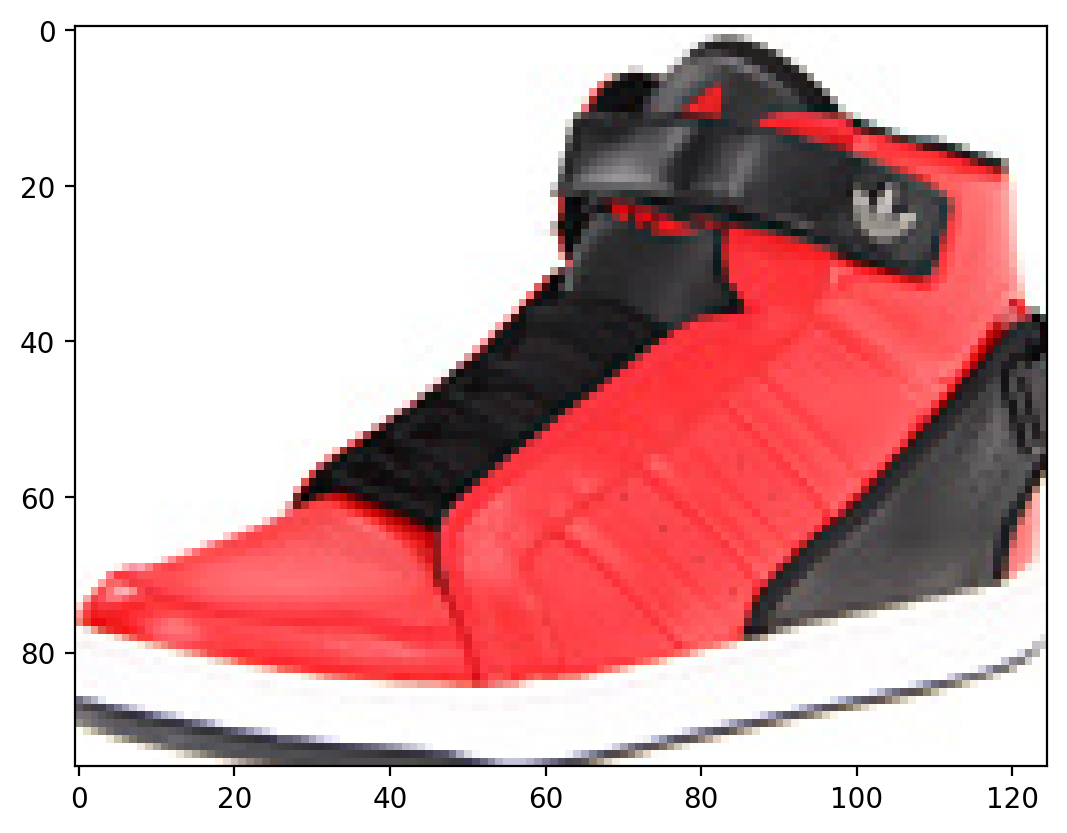

In [4]:
print(image_collection[0, 5000:5200])
plt.imshow(image_collection[0].astype(int).reshape((95, 125, 3)))
# was giving error when running with the greyscale code so changed to the line below
#plt.imshow(image_collection[0].reshape((default_length, default_width)), cmap='gray')
plt.show()

In [5]:
# Preprocess the data
# Because of the curse of dimensionality, we'll use UMAP to reduce the dimensionality
image_collection_mean = np.mean(image_collection, axis=0, keepdims=True)
print(f"image_collection_mean shape: {image_collection_mean.shape}")

# Mean centered data
mean_centered_data = image_collection - image_collection_mean

n_components = 2
umap_v1 = UMAP(n_neighbors=40, n_components=n_components, random_state=99, min_dist=0.05) #lowered the n_neighbors from 40 and the min_dist from 0.07
reduced_image_collection = umap_v1.fit_transform(mean_centered_data)

image_collection_mean shape: (1, 35625)


c:\Users\sialo\anaconda3\envs\ECE140\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [6]:
num_clusters = 100 #started at 20 and have increased
clustering = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')  
cluster_labels = clustering.fit_predict(reduced_image_collection)

In [7]:
print(cluster_labels[:800])
print(len((np.unique(cluster_labels))))

[90 83 37 17 32 33 43 24  7 73 31 52  8 87 32 40 81  4  4 50 70 77 92 57
 32 23 48 63 95 86 10 24 86 74 59 59 42 29 81 81 91 91 88 91 42 81 71 71
 75 81 81 79 32 40 67 75 23  8 57 10 63 95  8 22  8 63 71 75 81 81 81 17
 79 47 73 47 63 40 40 40 40 95 47 75 95 73 60 47 16 96  4 37 17 60 88 65
 47 37 79 60 92 79 37 96 60 25 96 88 70 96  5  2 96  5 96  8 60 60 11 70
 11 37  5 11 47 28  8 47 47 57 57 57 95 47  8 47 47  8 47 57 47 47 47 75
  8 95 57 92 60 59  5 16 96 16 79 79 16 65 95 95 63 63 70 96 88 45 16 88
  2 96  5 11 73 71 81 10  7 39 62  2 92 16 88 79 45 47 47 96 79 29 81 96
 47 45 96 37 45 16 29 29 75 78 78 60 41 60 57 77  8 53 53 14  6 32 76 88
  5 57 11 16  4 16 73  9 95 18 62  1  9  9 10 95 14 14 38  9 14  9  9 65
 67 65 65 27 13 74 65 89 27 50 50 23 67 74 27  9  9  9 29 29 29 74 37 59
 91  4 74 89  9 67  9  9  9  9  9 75 10 31 14 52 26  9  1 84 51 81  8 29
  9  9 52  2 74 43 63 63 63  8 73 73  9 92 18 25 18 51 69 54 18 69 92 91
  7 18 67 67 10 21 69 69 69  4  7 14 69 14  3  7  7

In [8]:
max_number_of_clusters = max(cluster_labels)+1  # Get the maximum cluster label
cluster_to_samples = {}

for elem in cluster_labels:
    if elem in cluster_to_samples:
        cluster_to_samples[elem] += 1
    else:
        cluster_to_samples[elem] = 1

print(f"The max number of clusters found were: {max_number_of_clusters}")  # Add 1 to account for cluster labels starting from 0
print(cluster_to_samples)
# Be careful about the clusters that only have 1 data sample to it 

The max number of clusters found were: 100
{90: 7, 83: 14, 37: 37, 17: 20, 32: 29, 33: 27, 43: 19, 24: 31, 7: 22, 73: 14, 31: 20, 52: 15, 8: 39, 87: 8, 40: 15, 81: 26, 4: 34, 50: 8, 70: 23, 77: 12, 92: 17, 57: 10, 23: 22, 48: 24, 63: 29, 95: 26, 86: 18, 10: 21, 74: 15, 59: 30, 42: 11, 29: 42, 91: 19, 88: 16, 71: 13, 75: 20, 79: 16, 67: 16, 22: 23, 47: 19, 60: 12, 16: 28, 96: 13, 65: 18, 25: 20, 5: 33, 2: 32, 11: 18, 28: 13, 45: 9, 39: 42, 62: 18, 78: 21, 41: 14, 53: 27, 14: 38, 6: 29, 76: 17, 9: 22, 18: 25, 1: 20, 38: 21, 27: 18, 13: 15, 89: 23, 26: 17, 84: 12, 51: 15, 69: 18, 54: 19, 21: 12, 3: 19, 20: 16, 15: 31, 55: 23, 97: 9, 30: 15, 80: 15, 98: 11, 36: 15, 82: 17, 99: 20, 58: 21, 56: 15, 0: 31, 66: 16, 34: 22, 64: 20, 35: 21, 49: 14, 44: 12, 93: 11, 46: 23, 19: 18, 12: 28, 85: 12, 61: 15, 72: 8, 68: 13, 94: 21}


In [9]:
#Find Centroids
def find_centroids(labels, num_of_clusters, data):
    cluster_means = np.zeros((num_of_clusters, 2))
    for i in range(num_of_clusters):  # Start from 0 and iterate up to num_of_clusters - 1
        # Finds the points associated with cluster i
        indices = labels == i
        cluster_means[i] = np.sum(data[indices, :], axis=0) / np.sum(indices)
    return cluster_means

In [10]:
centroids = find_centroids(cluster_labels, max_number_of_clusters, reduced_image_collection)
print(centroids.shape)
print(centroids)

(100, 2)
[[11.39008713  9.7399416 ]
 [ 7.47788858  9.75629425]
 [12.1284008  11.32274342]
 [ 8.55440426  7.88257742]
 [ 4.88316774 10.74939919]
 [ 9.15077019 11.71407986]
 [ 5.0489974   9.7233305 ]
 [ 8.9473381   8.72430515]
 [12.30487251 10.8803215 ]
 [ 5.02176619  8.4860754 ]
 [10.48573112  9.9502306 ]
 [ 8.29208374 11.85824013]
 [ 9.15676785  8.22101784]
 [ 6.71705294 11.81454849]
 [ 6.24318743  7.10534286]
 [ 8.93410397 10.86935616]
 [12.08241463 11.72651386]
 [11.31405067 11.71004772]
 [ 5.67822027  7.89655399]
 [ 8.8640213   7.61883974]
 [ 7.07315731 11.68663216]
 [ 7.07286119  6.88401794]
 [10.21395969 11.46058464]
 [11.90918541 10.51022339]
 [11.87849617 10.17233944]
 [ 9.8298645  11.60011387]
 [ 6.6623497   9.47485065]
 [ 6.24345541 10.83516788]
 [10.43004513 10.86429024]
 [ 7.19622707 12.56583691]
 [ 7.6182723  11.94207478]
 [ 7.01707697  7.89986134]
 [ 7.92989445  8.58370018]
 [ 7.73224401 10.7619791 ]
 [ 5.41798735  9.13805294]
 [ 5.54239702  9.62108326]
 [ 8.64344883  9.64

In [11]:
def visualize_clusters(umap_embeddings, cluster_labels,centroids):
 
    num_clusters = len(np.unique(cluster_labels))
    
    colors = plt.cm.get_cmap('tab20', num_clusters)
    
    # Create a scatter plot of the UMAP embeddings with each cluster colored differently
    plt.figure(figsize=(8, 6))
    for i, cluster_label in enumerate(np.unique(cluster_labels)):
        plt.scatter(umap_embeddings[cluster_labels == cluster_label, 0], 
                    umap_embeddings[cluster_labels == cluster_label, 1], 
                    label=f'Cluster {cluster_label}', color=colors(i))
    for i in range(num_clusters):
        plt.scatter(centroids[i, 0], centroids[i, 1], color='black', marker='x', s=100)
        plt.text(centroids[i, 0], centroids[i, 1], f'Centroid {i}', fontsize=10, verticalalignment='bottom')

    plt.title('Clusters Visualization')
    plt.xlabel('UMAP Dimension 1')
    plt.ylabel('UMAP Dimension 2')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

C:\Users\sialo\AppData\Local\Temp\ipykernel_47028\651378805.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', num_clusters)


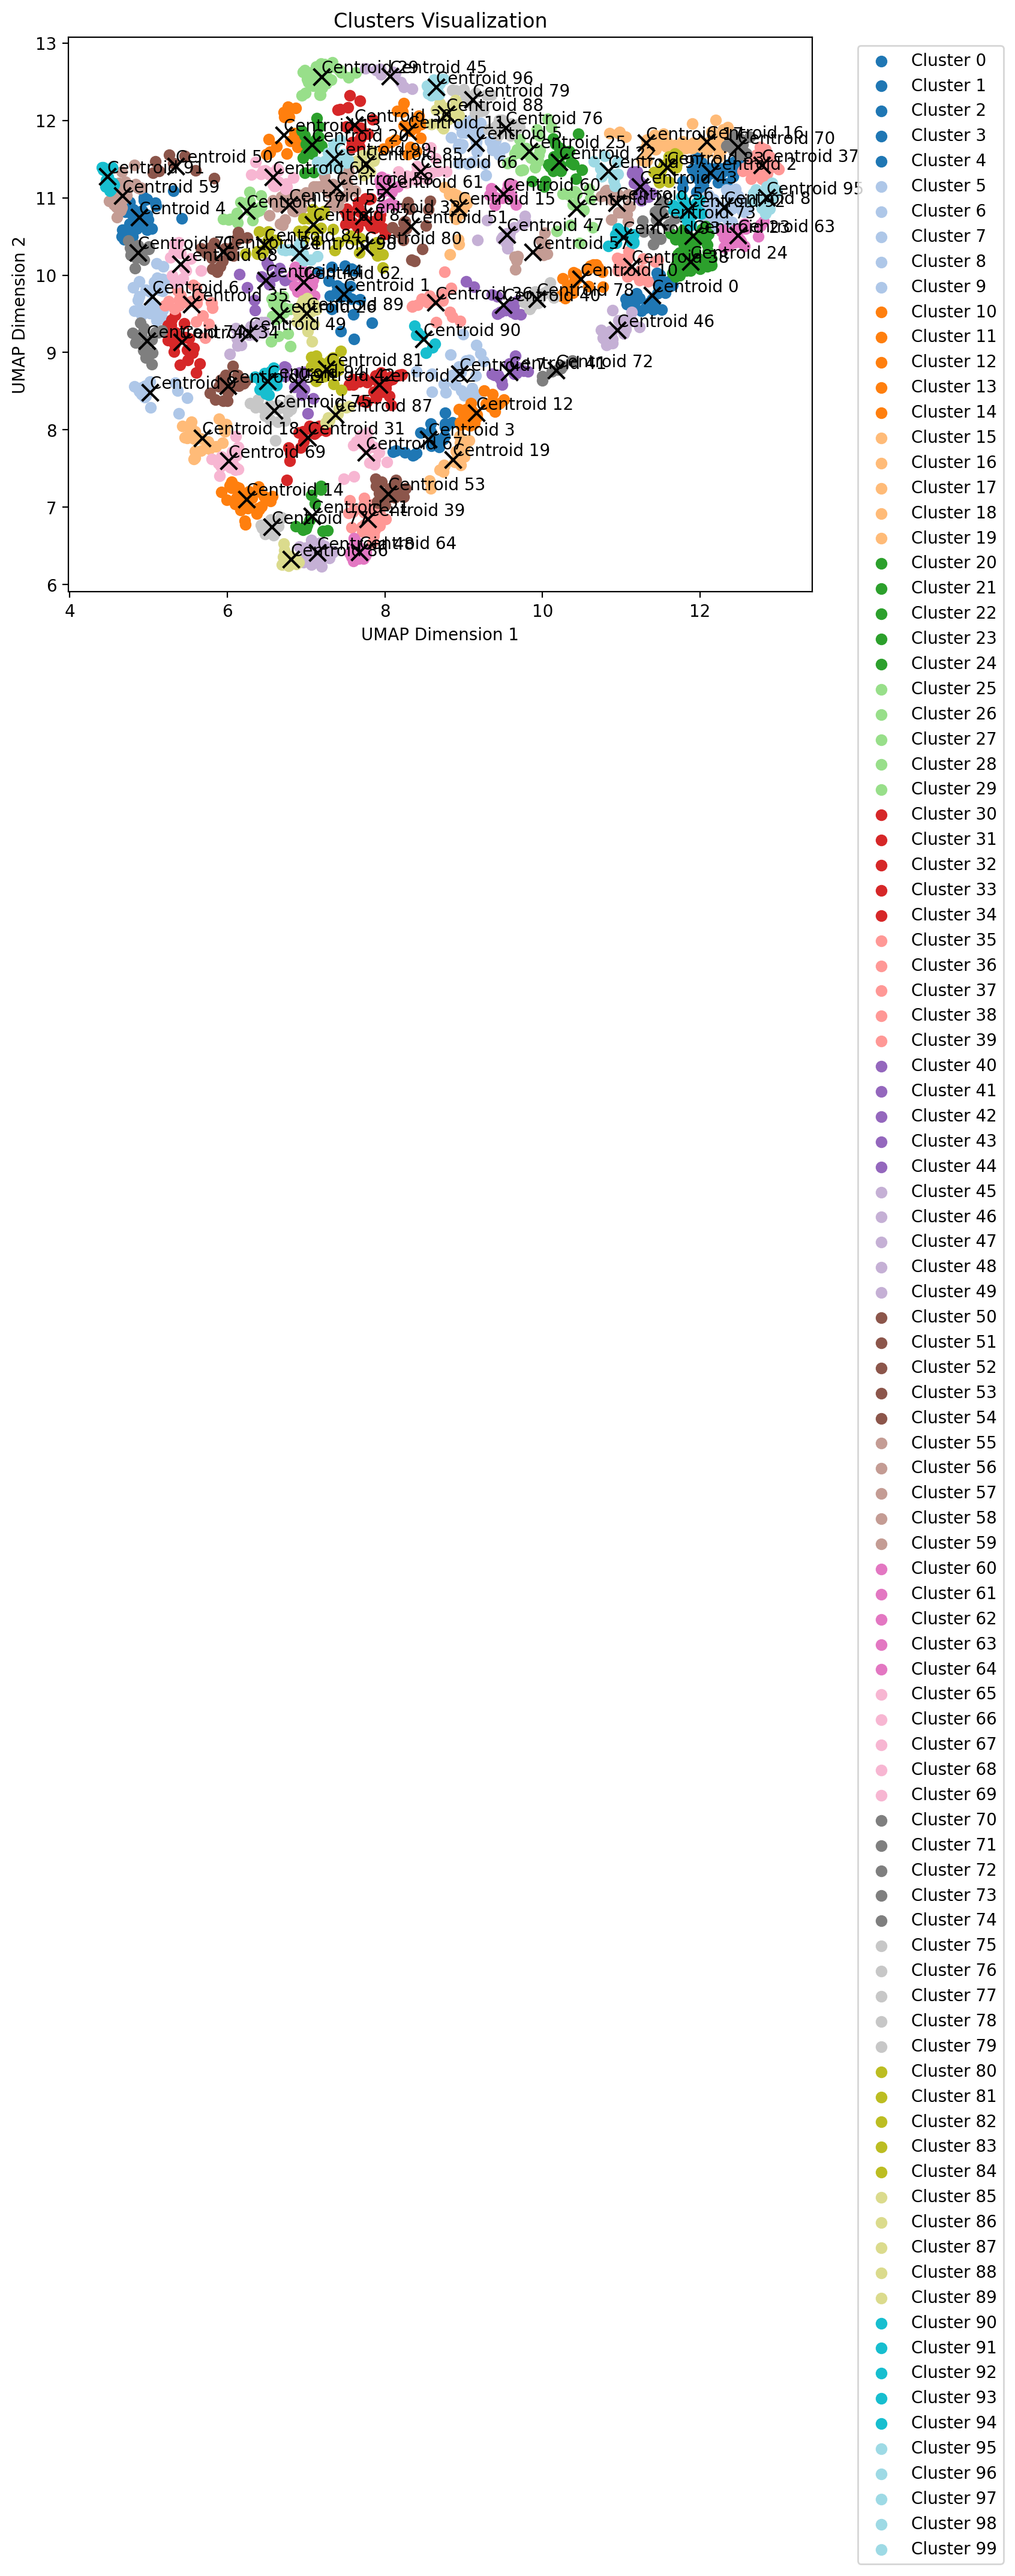

In [12]:
visualize_clusters(reduced_image_collection, cluster_labels,centroids)

In [13]:
def input_image_preprocesser(pathway, umap_arg):
    # Loads the images into the notebook as a list and then changes it to a numpy array
    image_list = Image.open(pathway)
    
    #image_gray = image_list.convert('L')  # Convert to grayscale
    #image_np = np.array(image_gray)
        
    image_np = np.array(image_list)
    image_gray = grayscale(image_np)
    # Remove rows and columns, comment out this whole section for the old grayscale to work
    rows_to_delete = [0, 1, 2, -1, -2, -3, -4]
    cols_to_delete = [0, 1, 2, 3, 4, 5, -1, -2, -3, -4, -5]
    image_np = np.delete(image_np, rows_to_delete, axis=0)
    image_np = np.delete(image_np, cols_to_delete, axis=1)
    print(f"Image Shape: {image_np.shape}")
    # Image truncated shape: (95, 125, 3)
    
    # Flatten the image
    image_flat = image_np.reshape(1, -1) # (1, 200)
    image_flat = umap_arg.transform(image_flat)
    return image_flat

In [14]:
def predict_cluster_label(umap_embedding, clustering_model):
    # Use the trained clustering model to predict the cluster label for the UMAP embedding
    cluster_label = clustering_model.fit_predict(umap_embedding.reshape(1, -1))
    return cluster_label

In [15]:
print("Reduced image collection shape:", reduced_image_collection.shape)

# Assuming 'input_image_path' is the path to the input image
input_image = input_image_preprocesser("sneakers/Reebok/7975411.355043.jpg",umap_v1)

# Verify the dimensions of input_image and reduced_image_collection
print("Input image shape:", input_image.shape)

#adjusted code for the grayscaling
#umap_embedding_input = np.expand_dims(input_image, axis=0)
#umap_embedding_input = umap_embedding_input[0] #for the grayscale need to reduce more dim
#umap_embeddings_combined = np.concatenate((reduced_image_collection, umap_embedding_input), axis=0)

umap_embeddings_combined = np.concatenate((reduced_image_collection, input_image), axis=0)
print("umap_embeddings_combined:", umap_embeddings_combined.shape)

cluster_labels = clustering.fit_predict(umap_embeddings_combined)
predicted_cluster_label = cluster_labels[-1]
print("Predicted Cluster Label:", predicted_cluster_label)

Reduced image collection shape: (1978, 2)
Image Shape: (95, 125, 3)
Input image shape: (1, 2)
umap_embeddings_combined: (1979, 2)
Predicted Cluster Label: 6


18
[255. 255. 255. ... 255. 255. 255.]


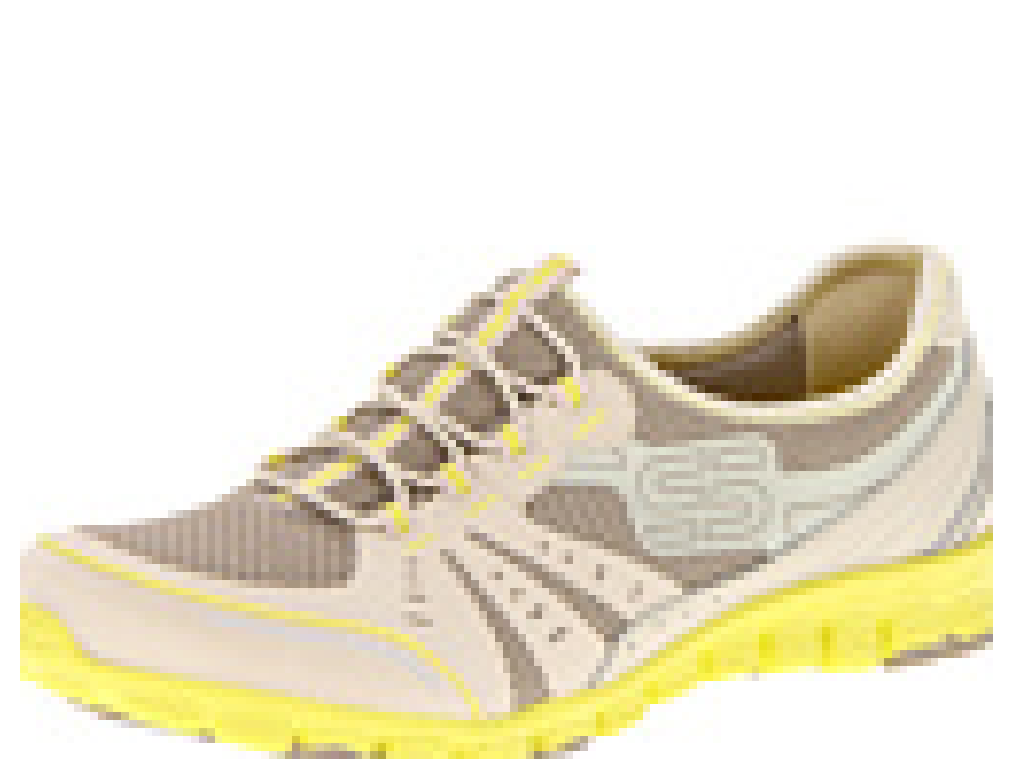

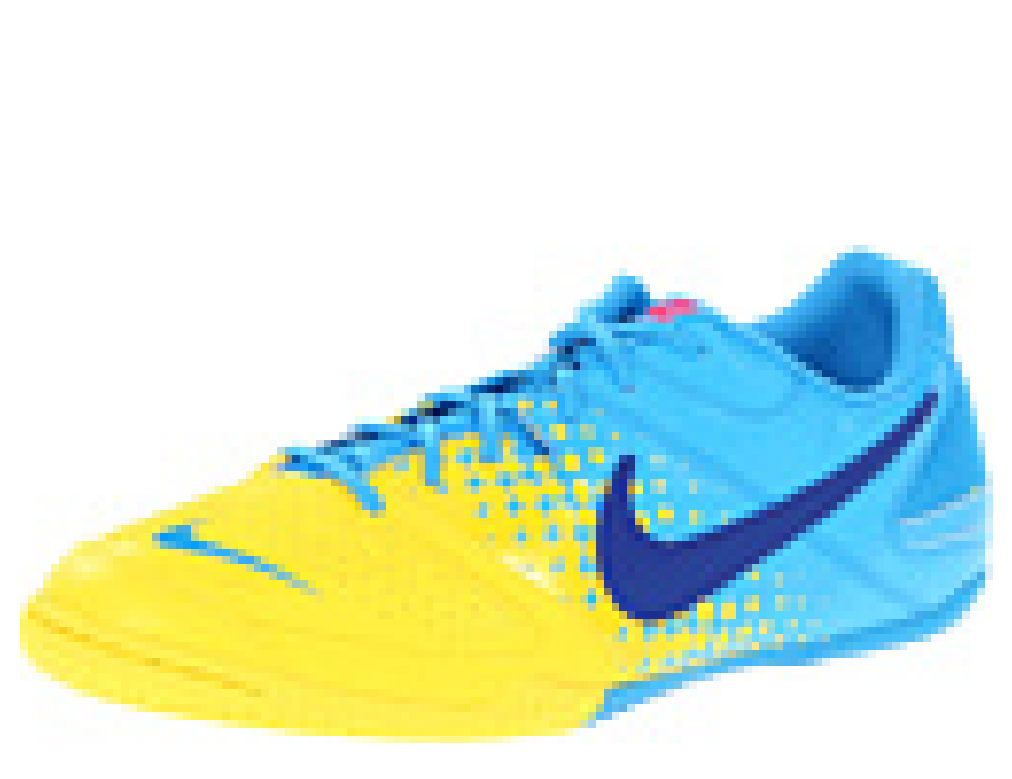

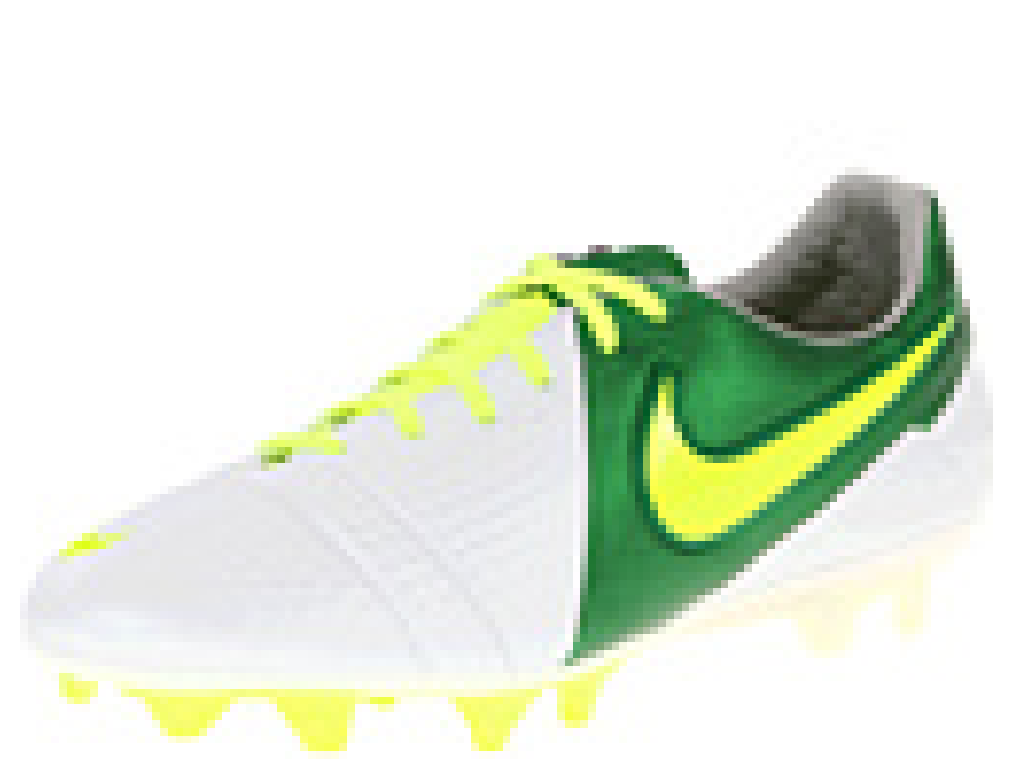

Selected Images from the Cluster: [1657, 578, 1258]


In [16]:
cluster_indices = np.where(cluster_labels == predicted_cluster_label)[0]
print((len(cluster_indices)))
# Randomly select three indices from the cluster (excluding the input image)
import random
random_indices = random.sample(list(cluster_indices), min(3, len(cluster_indices)))

print(image_collection[random_indices[0]])

for i in random_indices:
    plt.imshow((image_collection[i].reshape((95, 125, 3))).astype(int))
    #plt.imshow(image_collection[i].reshape((default_length, default_width)), cmap='gray')#new image size reshape for the grayscale

    plt.axis('off')  # Turn off axis
    plt.show()

print("Selected Images from the Cluster:", random_indices)

In [17]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

def plot_silhouette_score(umap_embedding, labels):
    silhouette_scores = silhouette_samples(umap_embedding, labels)
    silhouette_avg = silhouette_score(umap_embedding, labels)
    
    # Create a subplot with 1 row and 1 column
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(10, 15)
    y_lower = 10
    
    for i in range(len(set(labels))):
        # Aggregate the silhouette scores for samples belonging to cluster i
        ith_cluster_silhouette_values = silhouette_scores[labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / len(set(labels)))
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  

    ax.set_title("Silhouette plot")
    ax.set_xlabel("Silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([]) 
    ax.set_xticks([-0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()

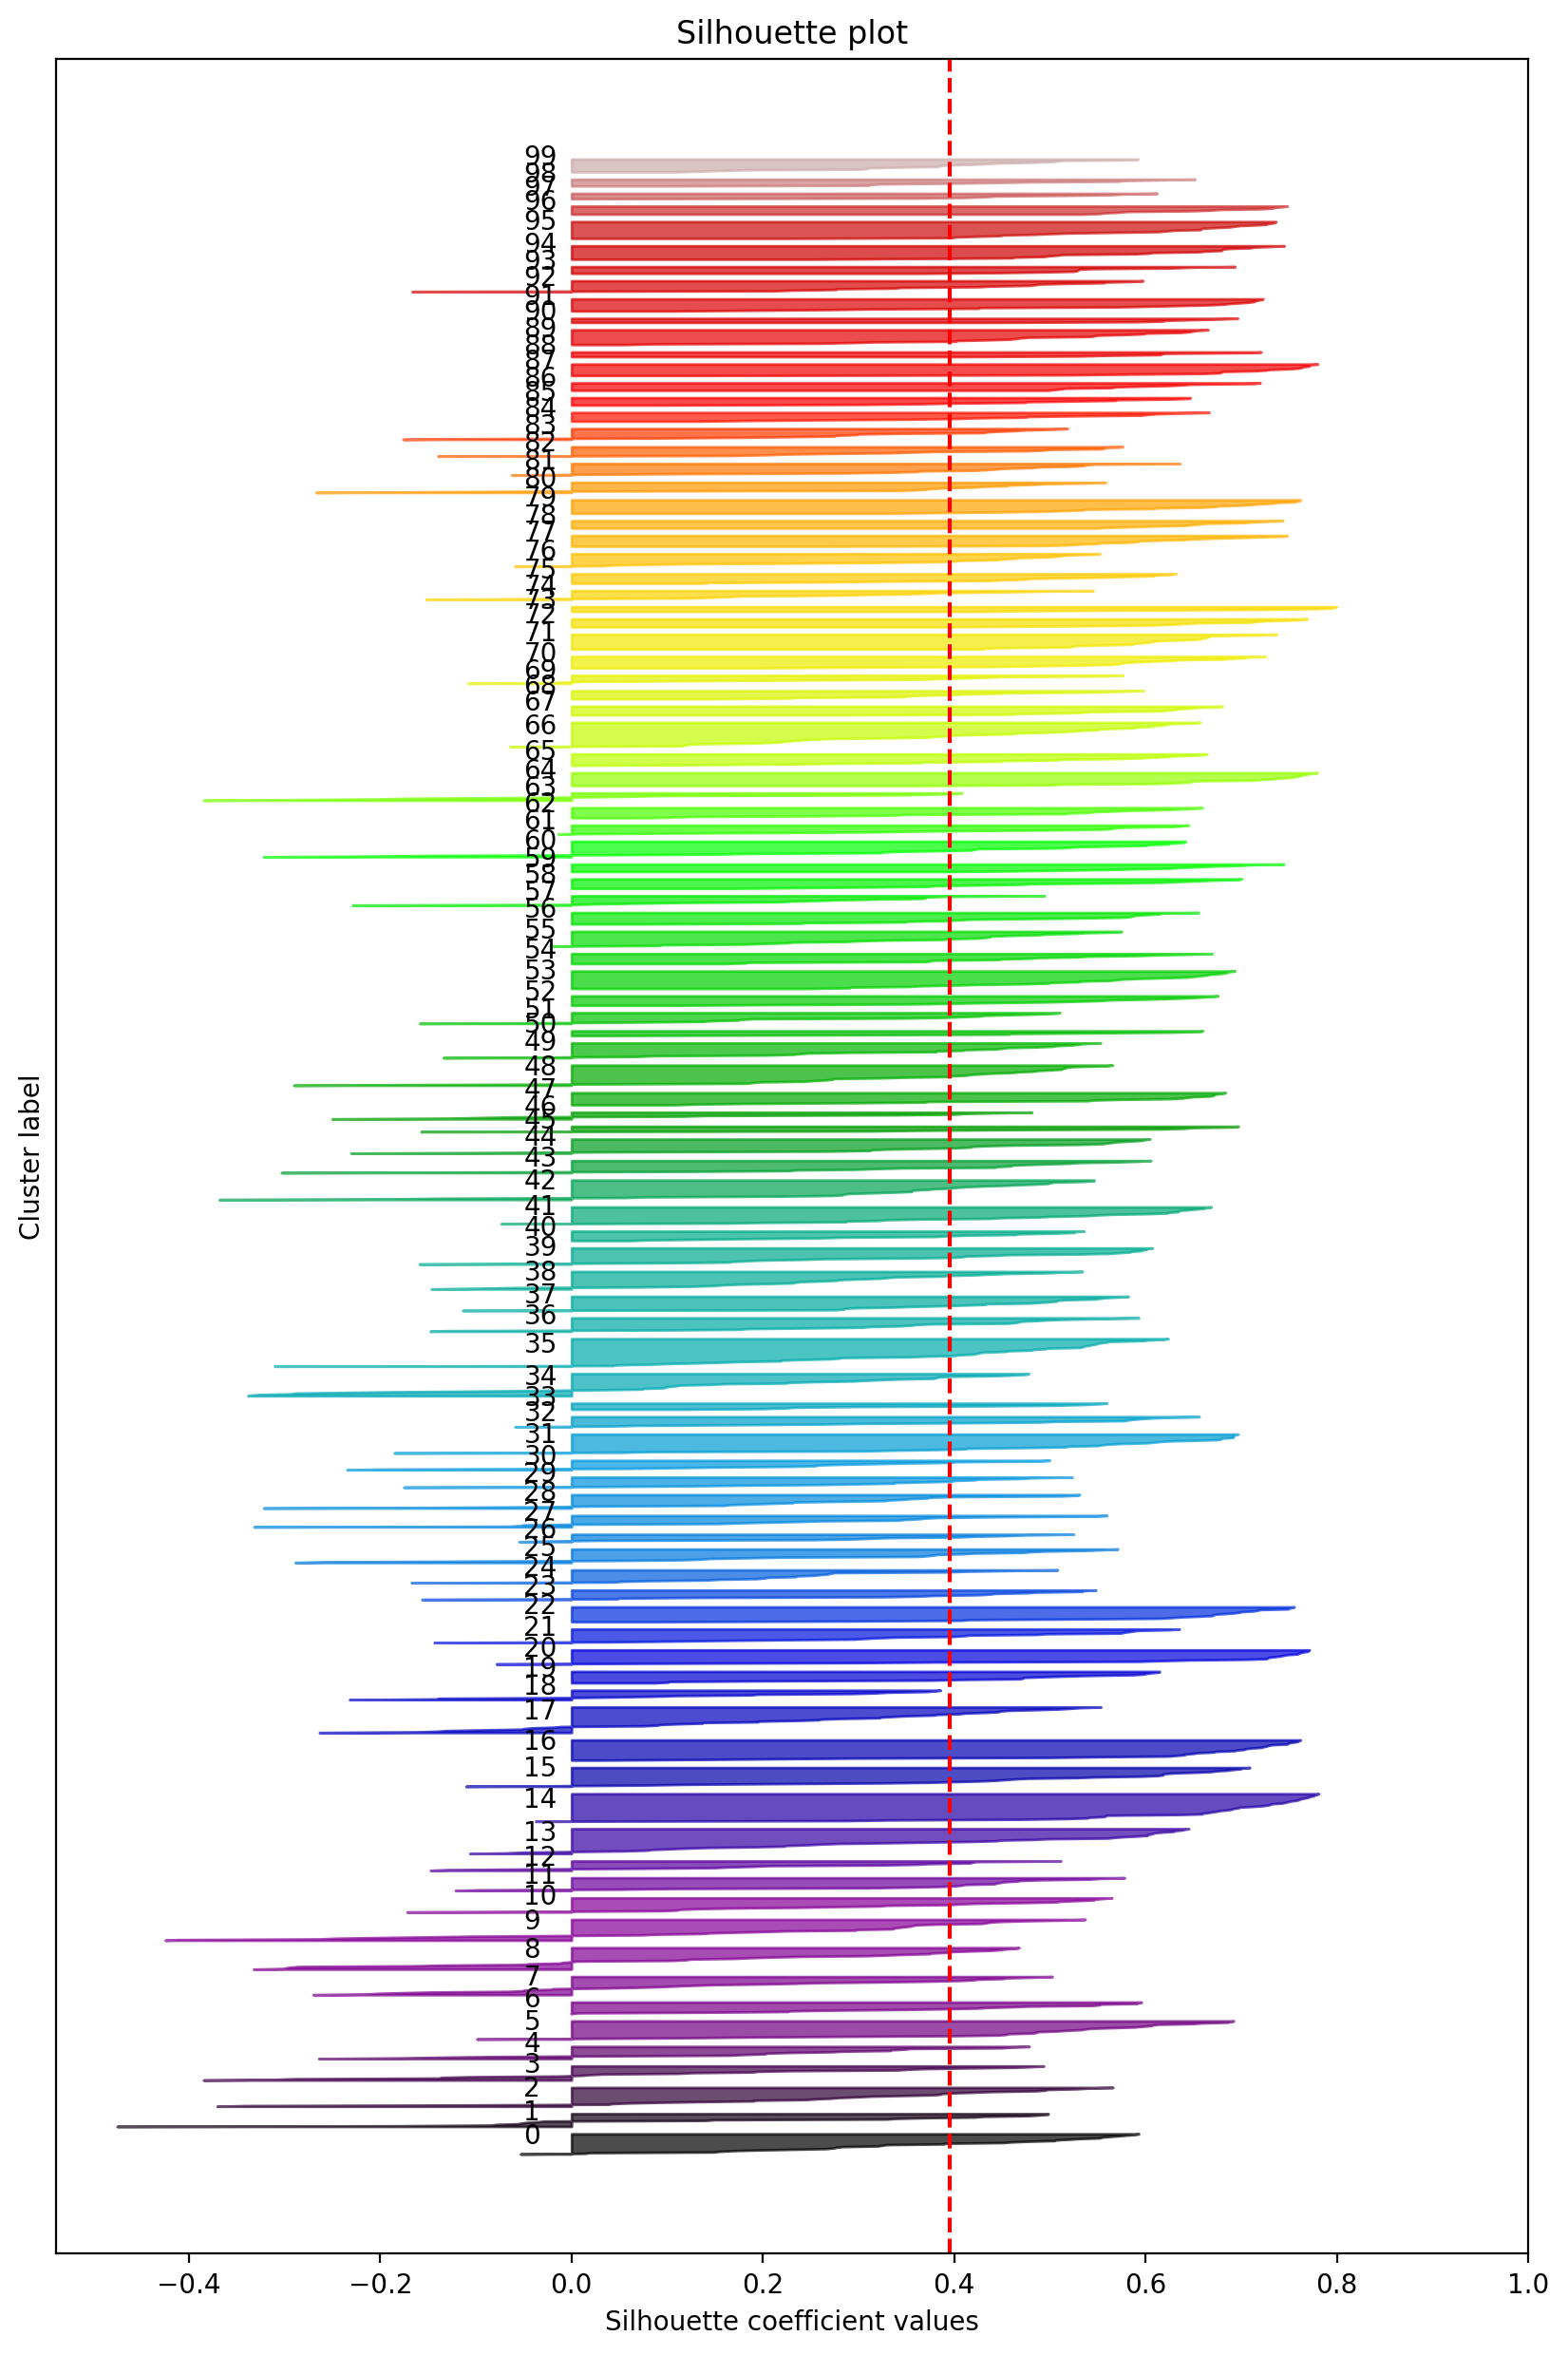

Silhouette Score: 0.39499116


In [18]:
plot_silhouette_score(umap_embeddings_combined, cluster_labels)

silhouette_avg = silhouette_score(umap_embeddings_combined, cluster_labels)
print("Silhouette Score:", silhouette_avg)

In [ ]:
# Silhouette Score: 0.39499116